In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.style as sty
from pylab import rcParams
import matplotlib
import warnings
warnings.filterwarnings("ignore")

np.random.seed(8)


In [2]:
#Importing the dataset into Python environment

CreditData = pd.read_csv('C:/Users/Study/Downloads/Semester 3/Machine Learning/Project 1/german_credit_data.csv')

In [3]:
print('Dimensions of the German Credit Risk Data', CreditData.shape)  #Size of the dataset (No.of rows, No. of columns)

Dimensions of the German Credit Risk Data (1000, 10)


In [4]:
# Exploring the concise summary of the dataset
print(CreditData.dtypes)

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object


In [5]:
#Looking for the unique values
print(CreditData.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [6]:
CreditData.head(6) #Reading the first 6 rows or observation of the dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good


In [7]:
# Clealry from the output we can see that there are 'NaN' values present in our dataset for some of the columns
# Before preceding further for pre-processing, we will try and find those columns that have maximum missing values present

Total = CreditData.isnull().sum().sort_values(ascending=False)
Percent = (CreditData.isnull().sum()/CreditData.isnull().count()).sort_values(ascending=False)
Missing_Data = pd.concat([Total, Percent], axis=1, keys=['Total','Percent'])
print(Missing_Data)

                  Total  Percent
Checking account    394    0.394
Saving accounts     183    0.183
Risk                  0    0.000
Purpose               0    0.000
Duration              0    0.000
Credit amount         0    0.000
Housing               0    0.000
Job                   0    0.000
Sex                   0    0.000
Age                   0    0.000


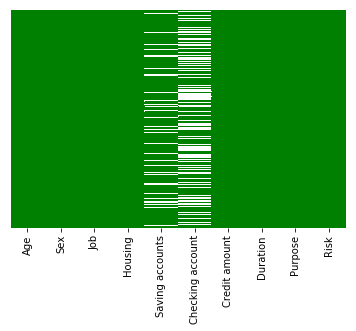

In [8]:
sns.heatmap(CreditData.isnull(),yticklabels=False,cbar=False,cmap='ocean')
# We see that white spaces in the heatmap are the missing values from the data

In [9]:
CreditData['Sex'] = CreditData['Sex'].str.strip()
CreditData['Housing'] = CreditData['Housing'].str.strip()
CreditData['Saving accounts'] = CreditData['Saving accounts'].str.strip()
CreditData['Checking account'] = CreditData['Checking account'].str.strip()
CreditData['Purpose'] = CreditData['Purpose'].str.strip()
CreditData['Risk'] = CreditData['Risk'].str.strip()

In [10]:
print(CreditData.describe(include='object'))

         Sex Housing Saving accounts Checking account Purpose  Risk
count   1000    1000             817              606    1000  1000
unique     2       3               4                3       8     2
top     male     own          little           little     car  good
freq     690     713             603              274     337   700


In [11]:
print(CreditData.describe(include='int64'))

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [12]:
#Checking for all the unique value in the categorical data
categoricalcolumn = ['Sex','Housing','Saving accounts','Checking account','Purpose','Risk']
for col in categoricalcolumn:
    print('Unique values for ' + col)
    print(CreditData[col].unique())
    print('')

Unique values for Sex
['male' 'female']

Unique values for Housing
['own' 'free' 'rent']

Unique values for Saving accounts
[nan 'little' 'quite rich' 'rich' 'moderate']

Unique values for Checking account
['little' 'moderate' nan 'rich']

Unique values for Purpose
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Unique values for Risk
['good' 'bad']



In [13]:
# Creating group on the basis of age
CreditData['Age_Group'] = np.nan

lst = [CreditData]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 27), 'Age_Group'] = '18-27'
    col.loc[(col['Age'] > 28) & (col['Age'] <= 37), 'Age_Group'] = '28-37'
    col.loc[(col['Age'] > 38) & (col['Age'] <= 47), 'Age_Group'] = '38-47'
    col.loc[(col['Age'] > 48) & (col['Age'] <= 57), 'Age_Group'] = '48-57'
    col.loc[col['Age'] > 58, 'Age_Group']='58+'

In [14]:
CreditData.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,58+
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,18-27
2,49,male,1,own,little,NaN,2096,12,education,good,48-57
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,38-47
4,53,male,2,free,little,little,4870,24,car,bad,48-57


In [15]:
#Changing Job Variables
CreditData['Job'].replace(0,'Unskilled and Non resident',inplace=True)
CreditData['Job'].replace(1,'Unskilled and Resident',inplace=True)
CreditData['Job'].replace(2,'Skilled',inplace=True)
CreditData['Job'].replace(3,'Highly Skilled',inplace=True)

CreditData.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,Skilled,own,NaN,little,1169,6,radio/TV,good,58+
1,22,female,Skilled,own,little,moderate,5951,48,radio/TV,bad,18-27
2,49,male,Unskilled and Resident,own,little,NaN,2096,12,education,good,48-57
3,45,male,Skilled,free,little,little,7882,42,furniture/equipment,good,38-47
4,53,male,Skilled,free,little,little,4870,24,car,bad,48-57


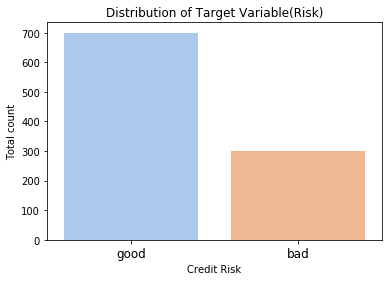

In [16]:
sns.countplot('Risk',data = CreditData,palette="pastel")
plt.title('Distribution of Target Variable(Risk)',fontsize=12)
plt.ylabel('Total count')
plt.xlabel('Credit Risk')
plt.xticks(fontsize = 12)
plt.show()

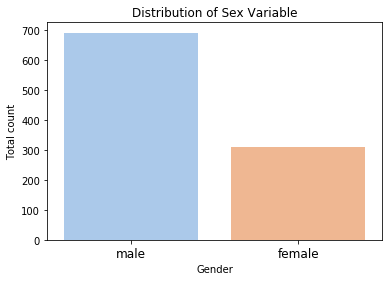

In [17]:
sns.countplot('Sex',data = CreditData,palette="pastel")
plt.title('Distribution of Sex Variable',fontsize=12)
plt.ylabel('Total count')
plt.xlabel('Gender')
plt.xticks(fontsize = 12)
plt.show()

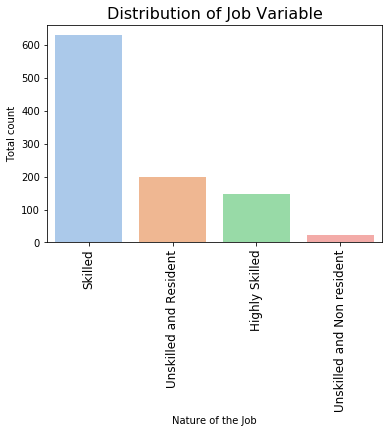

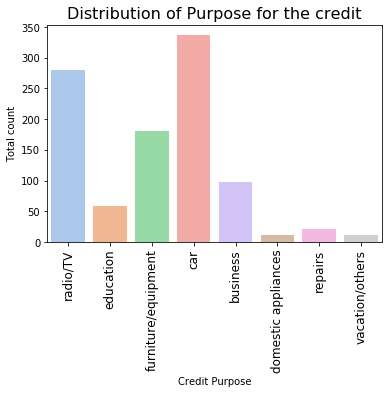

In [18]:
sns.countplot('Job',data = CreditData,palette="pastel")
plt.title('Distribution of Job Variable',fontsize=16)
plt.xticks(rotation=90,fontsize = 12)
plt.ylabel('Total count')
plt.xlabel('Nature of the Job')
plt.show()

sns.countplot('Purpose',data = CreditData,palette="pastel")
plt.title('Distribution of Purpose for the credit',fontsize=16)
plt.ylabel('Total count')
plt.xlabel('Credit Purpose')
plt.xticks(rotation=90,fontsize = 12)
plt.show()

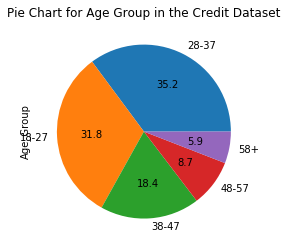

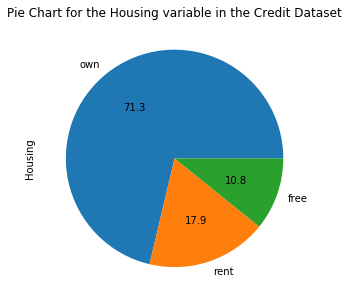

In [19]:
CreditData['Age_Group'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Pie Chart for Age Group in the Credit Dataset')
plt.show()
rcParams['figure.figsize']= 5,5


CreditData['Housing'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Pie Chart for the Housing variable in the Credit Dataset')
plt.show()
rcParams['figure.figsize']= 5,5

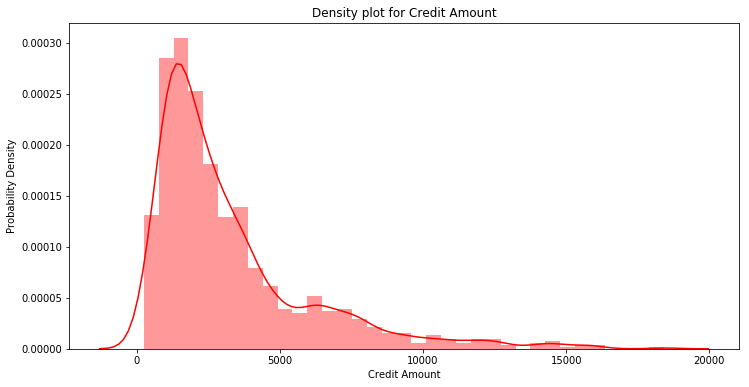

In [20]:
plt.figure(figsize = (12,6))
plt.title('Density plot for Credit Amount')
sns.set_color_codes("colorblind")
sns.distplot(CreditData['Credit amount'],kde=True,color="red")
plt.ylabel('Probability Density')
plt.xlabel('Credit Amount')
plt.show()

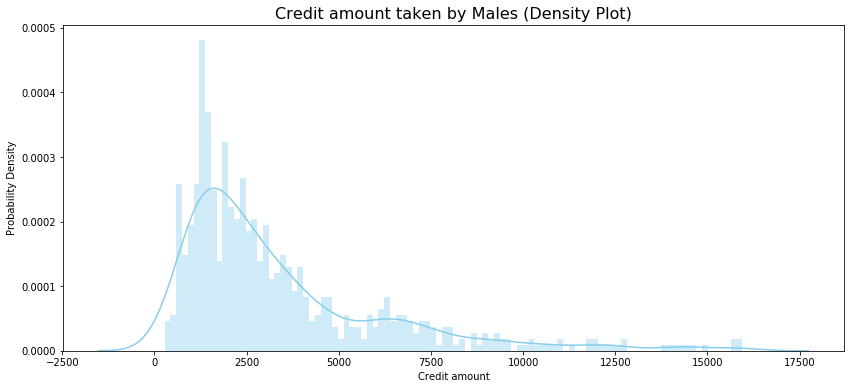

In [21]:
Purpose_0 = CreditData.loc[CreditData['Sex'] =='male']["Credit amount"]
plt.figure(figsize = (14,6))
sns.set_color_codes("pastel")
sns.distplot(Purpose_0,kde=True,bins=100, color="skyblue")
plt.title('Credit amount taken by Males (Density Plot)',fontsize=16)
plt.ylabel('Probability Density')
plt.show()

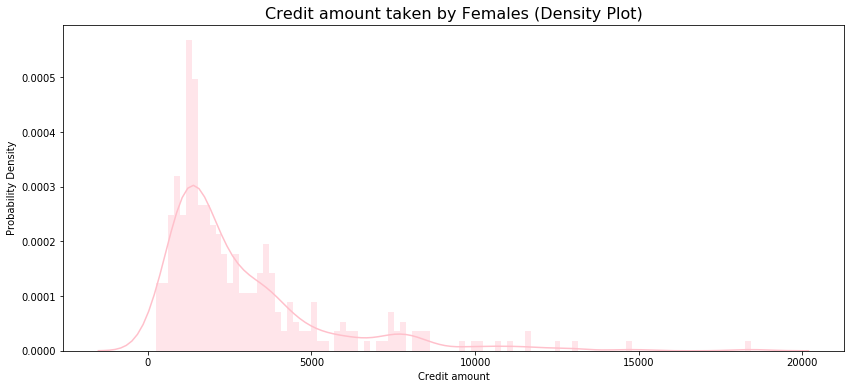

In [22]:
Purpose_1 = CreditData.loc[CreditData['Sex'] =='female']["Credit amount"]
plt.figure(figsize = (14,6))
sns.set_color_codes("pastel")
sns.distplot(Purpose_1,kde=True,bins=100, color="pink")
plt.title('Credit amount taken by Females (Density Plot)',fontsize=16)
plt.ylabel('Probability Density')
plt.show()

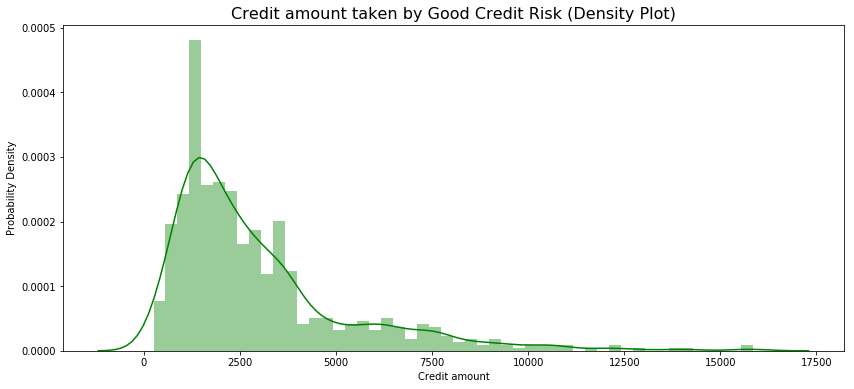

In [23]:
Purpose_2 = CreditData.loc[CreditData['Risk'] =='good']["Credit amount"]
plt.figure(figsize = (14,6))
sns.set_color_codes("pastel")
sns.distplot(Purpose_2,kde=True,bins=50, color="green")
plt.title('Credit amount taken by Good Credit Risk (Density Plot)',fontsize=16)
plt.ylabel('Probability Density')
plt.show()

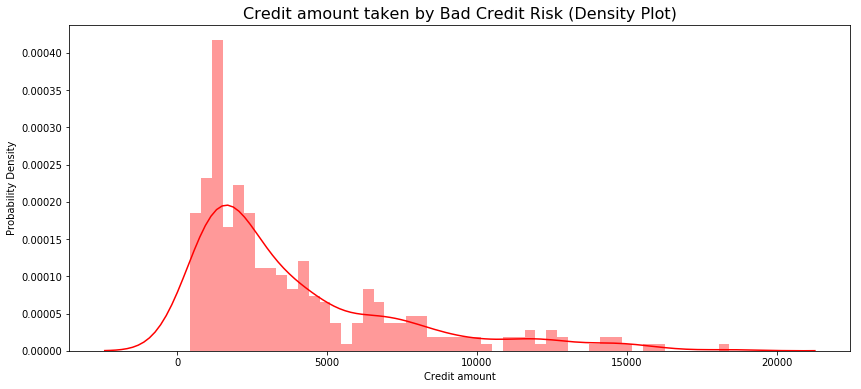

In [24]:
Purpose_3 = CreditData.loc[CreditData['Risk'] =='bad']["Credit amount"]
plt.figure(figsize = (14,6))
sns.set_color_codes("pastel")
sns.distplot(Purpose_3,kde=True,bins=50, color="red")
plt.title('Credit amount taken by Bad Credit Risk (Density Plot)',fontsize=16)
plt.ylabel('Probability Density')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

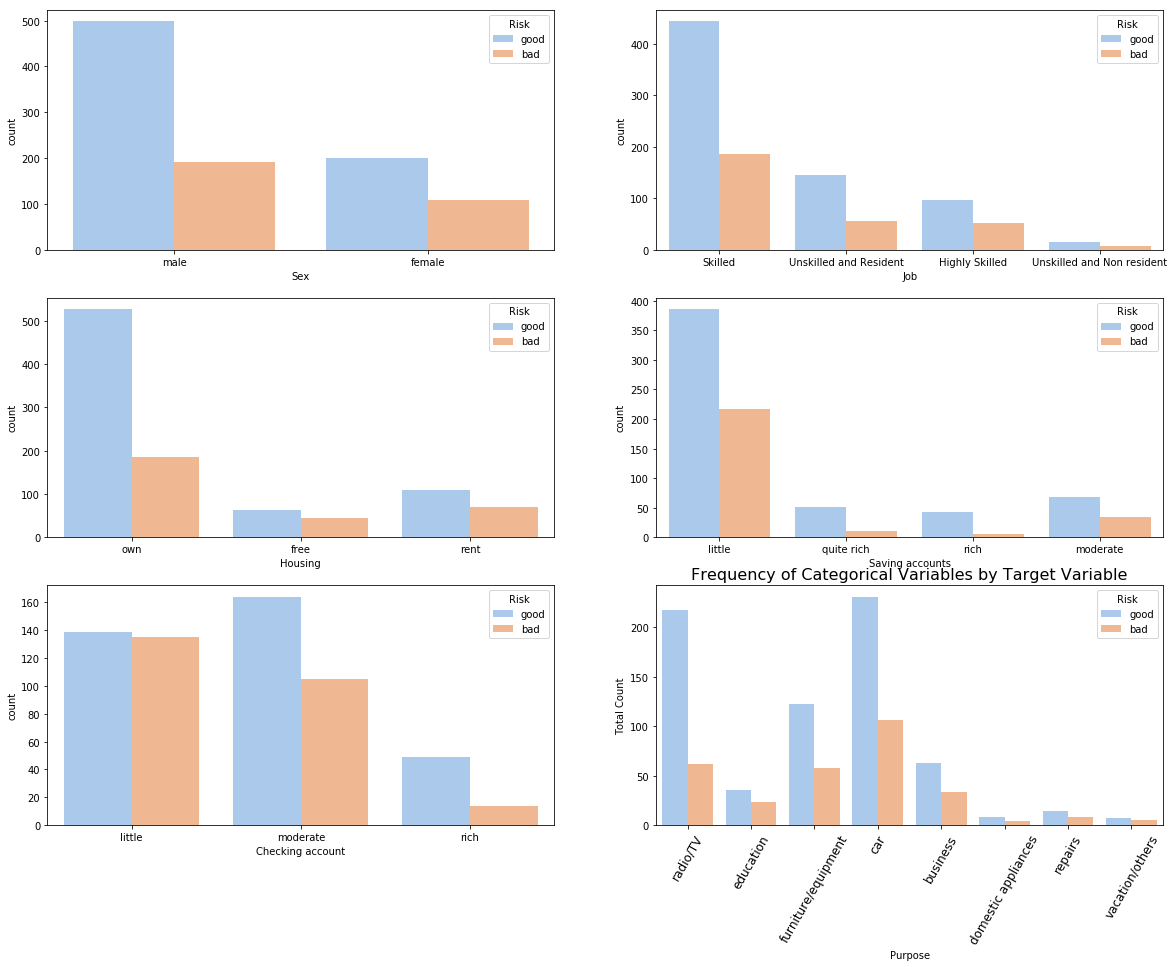

In [25]:
Subset = CreditData[['Sex','Job','Housing','Saving accounts','Checking account','Purpose','Risk']]
f,axes = plt.subplots(3,2,figsize=(20,15),facecolor= 'white')
plt.ylabel('Total Count')

ax1 = sns.countplot(x="Sex",hue="Risk",data=Subset,palette="pastel",ax=axes[0,0])
plt.ylabel('Total Count')

ax2 = sns.countplot(x="Job",hue="Risk",data=Subset,palette="pastel",ax=axes[0,1])
plt.ylabel('Total Count')

ax3 = sns.countplot(x="Housing",hue="Risk",data=Subset,palette="pastel",ax=axes[1,0])
plt.ylabel('Total Count')

ax4 = sns.countplot(x="Saving accounts",hue="Risk",data=Subset,palette="pastel",ax=axes[1,1])
plt.ylabel('Total Count')

ax5 = sns.countplot(x="Checking account",hue="Risk",data=Subset,palette="pastel",ax=axes[2,0])
plt.ylabel('Total Count')

ax6 = sns.countplot(x="Purpose",hue="Risk",data=Subset,palette="pastel",ax=axes[2,1])
plt.ylabel('Total Count')

plt.title('Frequency of Categorical Variables by Target Variable',fontsize=16)
plt.xticks(rotation=60,fontsize = 12)



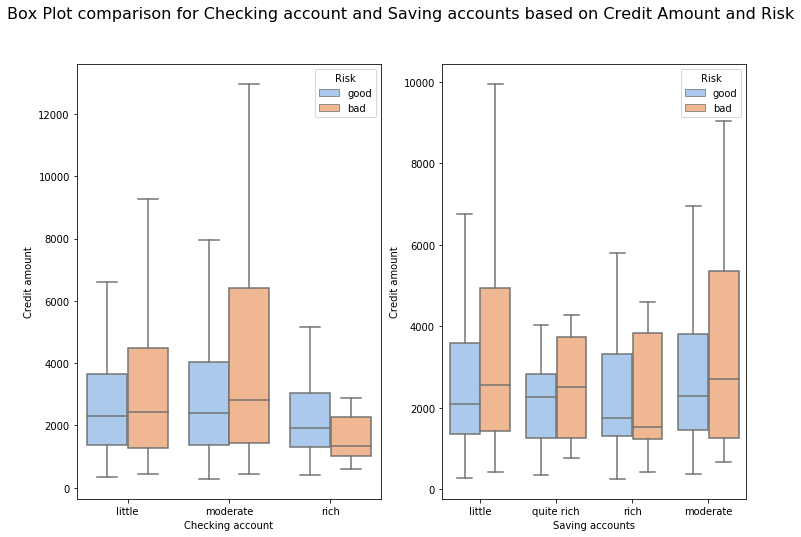

In [26]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,8))
s=sns.boxplot(ax=ax1,x='Checking account',y='Credit amount',hue='Risk',data=CreditData,palette="pastel",showfliers=False)
s=sns.boxplot(ax=ax2,x='Saving accounts',y='Credit amount',hue='Risk',data=CreditData,palette="pastel",showfliers=False)
fig.suptitle('Box Plot comparison for Checking account and Saving accounts based on Credit Amount and Risk', fontsize=16)
plt.show()

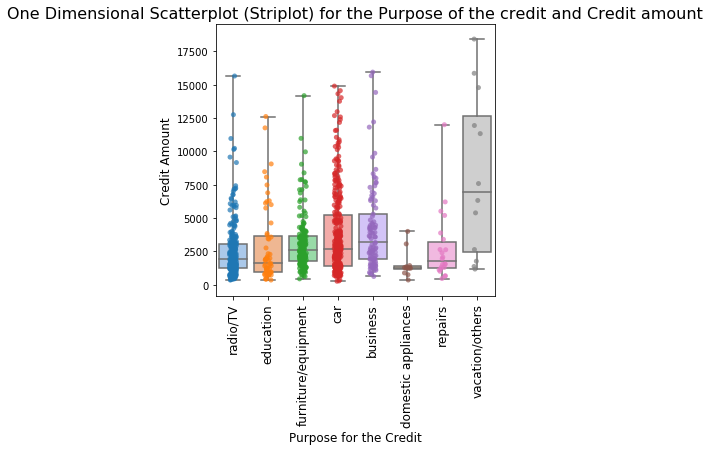

In [27]:
ax = sns.boxplot(x="Purpose", y="Credit amount", data=CreditData, whis=np.inf,palette="pastel")
ax = sns.stripplot(x="Purpose",y="Credit amount",data=CreditData,alpha=0.7)
plt.xlabel('Purpose for the Credit',fontsize = 12)
plt.ylabel('Credit Amount',fontsize = 12)
plt.xticks(rotation=90,fontsize = 12)
plt.title('One Dimensional Scatterplot (Striplot) for the Purpose of the credit and Credit amount',fontsize=16)
plt.show()

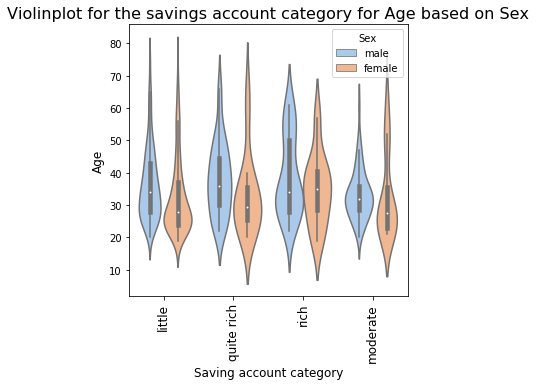

In [28]:
sns.violinplot(y='Age',x='Saving accounts',data = CreditData, hue='Sex',palette="pastel")
plt.xlabel('Saving account category',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.xticks(rotation=90,fontsize = 12)
plt.title('Violinplot for the savings account category for Age based on Sex',fontsize=16)
plt.show()

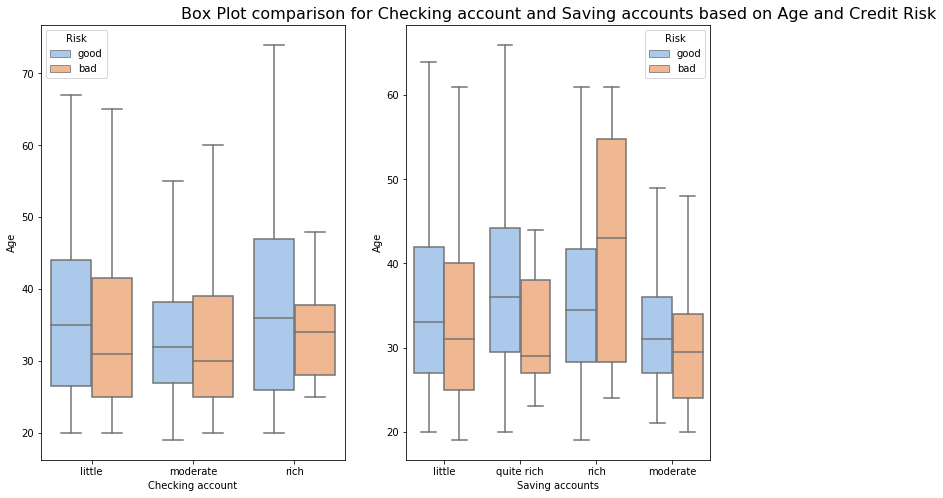

In [29]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,8))
s=sns.boxplot(ax=ax1,x='Checking account',y='Age',hue='Risk',data=CreditData,palette="pastel",showfliers=False)
s=sns.boxplot(ax=ax2,x='Saving accounts',y='Age',hue='Risk',data=CreditData,palette="pastel",showfliers=False)
plt.title('Box Plot comparison for Checking account and Saving accounts based on Age and Credit Risk',fontsize=16)
plt.show()

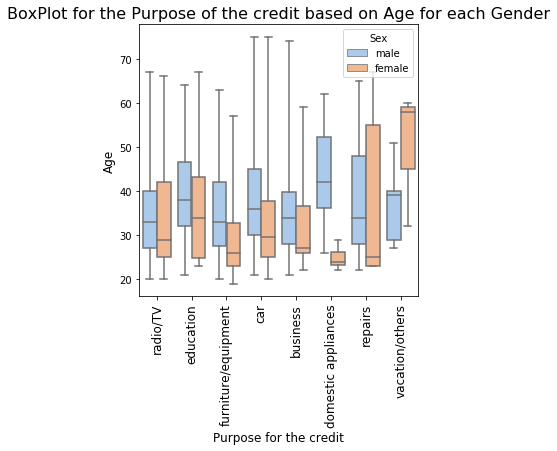

In [30]:
ax = sns.boxplot(x="Purpose", y="Age", data=CreditData, whis=np.inf,palette="pastel",hue='Sex')
plt.xlabel('Purpose for the credit',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.xticks(rotation=90,fontsize = 12)
plt.title('BoxPlot for the Purpose of the credit based on Age for each Gender',fontsize=16)
plt.show()

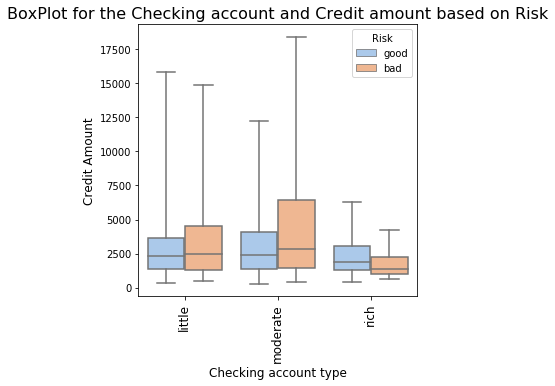

In [31]:
ax = sns.boxplot(x="Checking account", y="Credit amount", data=CreditData, whis=np.inf,palette="pastel",hue='Risk')
plt.xlabel('Checking account type',fontsize = 12)
plt.ylabel('Credit Amount',fontsize = 12)
plt.xticks(rotation=90,fontsize = 12)
plt.title('BoxPlot for the Checking account and Credit amount based on Risk',fontsize=16)
plt.show()

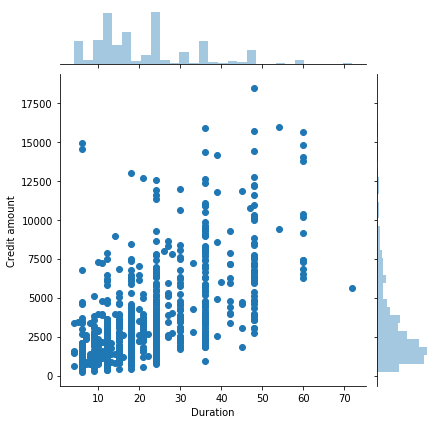

In [32]:
sns.jointplot(x='Duration',y='Credit amount',data=CreditData)

In [33]:
Gender = CreditData.groupby(['Job','Housing']).size().unstack(1)
Gender

Housing,free,own,rent
Job,,,
Highly Skilled,33,94,21
Skilled,63,452,115
Unskilled and Non resident,4,13,5
Unskilled and Resident,8,154,38


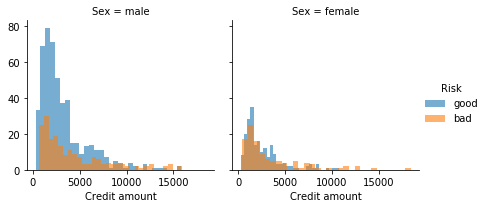

In [34]:
m = sns.FacetGrid(CreditData, col='Sex', hue='Risk')
m.map(plt.hist, 'Credit amount', alpha = 0.6, bins = 30)
m.add_legend()

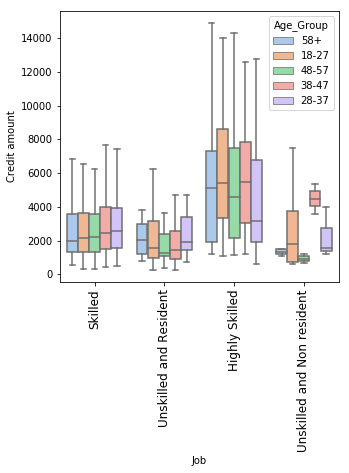

In [35]:
sns.boxplot(x='Job',y='Credit amount',hue='Age_Group',data=CreditData,palette="pastel",showfliers=False)
plt.xticks(rotation=90,fontsize = 12)
plt.show()

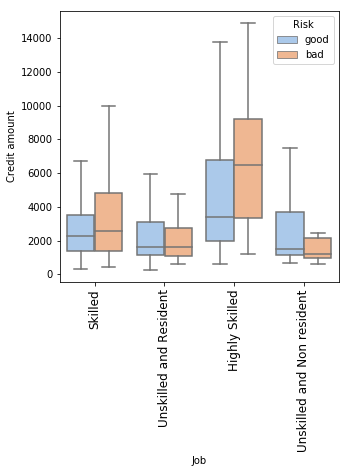

In [36]:
sns.boxplot(x='Job',y='Credit amount',hue='Risk',data=CreditData,palette="pastel",showfliers=False)
plt.xticks(rotation=90,fontsize = 12)
plt.show()

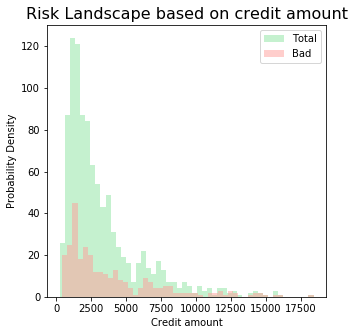

In [37]:
bins = 50

plt.hist(CreditData['Credit amount'],bins = bins, color='g',label = 'Total',alpha=0.5)
plt.hist(CreditData['Credit amount'][CreditData['Risk']=='bad'], bins = bins, color='r',label = 'Bad',alpha=0.5)

plt.xlabel('Credit amount'); plt.ylabel('Probability Density')
plt.title('Risk Landscape based on credit amount',fontsize=16)
plt.legend();plt.show()

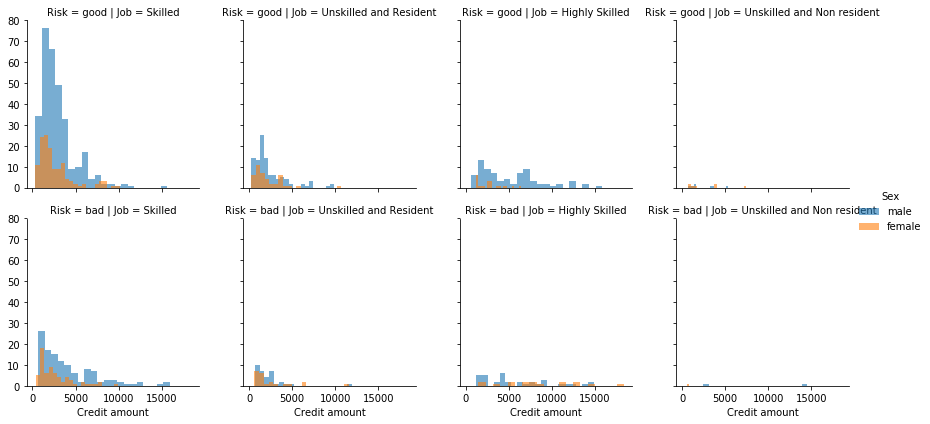

In [38]:
m = sns.FacetGrid(CreditData, col='Job', row = 'Risk', hue='Sex')
m.map(plt.hist, 'Credit amount', alpha = 0.6, bins=20)
m.add_legend()

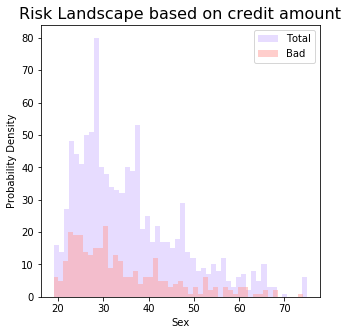

In [39]:
bins = 50

plt.hist(CreditData['Age'],bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(CreditData['Age'][CreditData['Risk']=='bad'], bins = bins, color='r',label = 'Bad',alpha=0.5)

plt.xlabel('Sex'); plt.ylabel('Probability Density')
plt.title('Risk Landscape based on credit amount',fontsize=16)
plt.legend();plt.show()

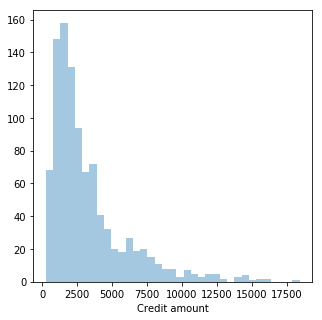

In [40]:
sns.distplot(CreditData['Credit amount'],kde=False)

In [41]:
#                            PHASE 2                               #

In [42]:
CreditData.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,Skilled,own,NaN,little,1169,6,radio/TV,good,58+
1,22,female,Skilled,own,little,moderate,5951,48,radio/TV,bad,18-27
2,49,male,Unskilled and Resident,own,little,NaN,2096,12,education,good,48-57
3,45,male,Skilled,free,little,little,7882,42,furniture/equipment,good,38-47
4,53,male,Skilled,free,little,little,4870,24,car,bad,48-57
5,35,male,Unskilled and Resident,free,NaN,NaN,9055,36,education,good,28-37
6,53,male,Skilled,own,quite rich,NaN,2835,24,furniture/equipment,good,48-57
7,35,male,Highly Skilled,rent,little,moderate,6948,36,car,good,28-37
8,61,male,Unskilled and Resident,own,rich,NaN,3059,12,radio/TV,good,58+
9,28,male,Highly Skilled,own,little,moderate,5234,30,car,bad,NaN


In [43]:
#Encoding Target feature
Data=CreditData.drop(columns='Risk')
Target=CreditData['Risk']

In [44]:
Target=Target.replace({'good':1,'bad':0})
Target.value_counts()

1    700
0    300
Name: Risk, dtype: int64

In [45]:
#Encoding Categorical Descriptive feature

categorical_cols = Data.columns[Data.dtypes==object].tolist()

for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col],drop_first=True)
        
Data=pd.get_dummies(Data)        

In [46]:
Data.columns

Index(['Age', 'Sex', 'Credit amount', 'Duration', 'Job_Highly Skilled',
       'Job_Skilled', 'Job_Unskilled and Non resident',
       'Job_Unskilled and Resident', 'Housing_free', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Age_Group_18-27', 'Age_Group_28-37',
       'Age_Group_38-47', 'Age_Group_48-57', 'Age_Group_58+'],
      dtype='object')

In [47]:
Data.sample(5,random_state=999)

,Age,Sex,Credit amount,Duration,Job_Highly Skilled,Job_Skilled,Job_Unskilled and Non resident,Job_Unskilled and Resident,Housing_free,Housing_own,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_Group_18-27,Age_Group_28-37,Age_Group_38-47,Age_Group_48-57,Age_Group_58+
842,23,0,1943,18,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
68,37,1,1819,36,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
308,24,0,1237,8,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
881,48,1,9277,24,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
350,23,0,1236,9,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# Feature scaling
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [49]:
pd.DataFrame(Data,columns=Data_df.columns).sample(5, random_state=999)

,Age,Sex,Credit amount,Duration,Job_Highly Skilled,Job_Skilled,Job_Unskilled and Non resident,Job_Unskilled and Resident,Housing_free,Housing_own,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_Group_18-27,Age_Group_28-37,Age_Group_38-47,Age_Group_48-57,Age_Group_58+
842,0.071429,0.0,0.093155,0.205882,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.321429,1.0,0.086332,0.470588,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
308,0.089286,0.0,0.054308,0.058824,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
881,0.517857,1.0,0.496699,0.294118,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.071429,0.0,0.054253,0.073529,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
# Importing altair library for visualisation

In [51]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [52]:
# Splitting the data into train and test data set

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier


x=pd.DataFrame(Data).values
y=pd.DataFrame(Target).values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4,stratify = y)

print('X_Test dimension:',X_test.shape)
print('X_Train dimension:',X_train.shape)
print('y_Test dimension:',y_test.shape)
print('y_Test dimension:',y_train.shape)

X_Test dimension: (300, 31)
X_Train dimension: (700, 31)
y_Test dimension: (300, 1)
y_Test dimension: (700, 1)


In [54]:
# Model Evaluation
#Cross validation (5 fold Repeated stratified cross validation)

from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,random_state=999)

In [55]:
###########  Model Building ############## 

In [56]:
## k-NN Algorithm #####

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNNpred = KNN.predict(X_test)

print(confusion_matrix(y_test, KNNpred))
print(classification_report(y_test, KNNpred))
print(round(accuracy_score(y_test, KNNpred),3)*100)

[[ 19  71]
 [ 30 180]]
              precision    recall  f1-score   support

           0       0.39      0.21      0.27        90
           1       0.72      0.86      0.78       210

   micro avg       0.66      0.66      0.66       300
   macro avg       0.55      0.53      0.53       300
weighted avg       0.62      0.66      0.63       300

66.3


In [58]:
#Hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameter_KNN = {'p':[1,2],
                 'n_neighbors':[2,4,6,8,10,12,14,16,18,20,24,26,27,28,30,32,34,36],
                 'weights':['uniform','distance']}
GridSearchKNN = GridSearchCV(estimator = KNeighborsClassifier(),
                             param_grid = parameter_KNN,
                     cv = cv_method,
                     verbose = 1,
                     scoring = 'roc_auc',
                        n_jobs=-2,
                     return_train_score=True)

GridSearchKNN.fit(X_train,y_train)

print("AUC Score:" + str(GridSearchKNN.best_score_))
print("Best Parameters: " + str(GridSearchKNN.best_params_))

Fitting 50 folds for each of 72 candidates, totalling 3600 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]: Done 1131 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-2)]: Done 3131 tasks      | elapsed:   18.8s


AUC Score:0.6803109815354713
Best Parameters: {'n_neighbors': 36, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-2)]: Done 3600 out of 3600 | elapsed:   21.8s finished


In [59]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [60]:
results_KNN = get_search_results(GridSearchKNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,n_neighbors,p,weights
70,0.680311,0.0436294,0.759232,0.553086,36,2,uniform
68,0.679118,0.0449714,0.76725,0.545068,36,1,uniform
66,0.678656,0.042742,0.763362,0.555879,34,2,uniform
64,0.678603,0.0429374,0.761054,0.555637,34,1,uniform
60,0.676443,0.0433901,0.750972,0.55758,32,1,uniform


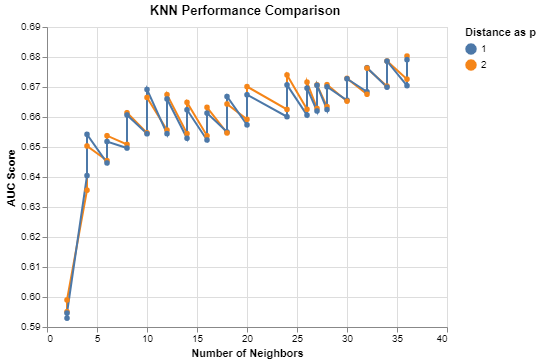

In [61]:
import altair as alt
alt.Chart(results_KNN, 
          title='KNN Performance Comparison '
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('p:N', title='Distance as p')
)

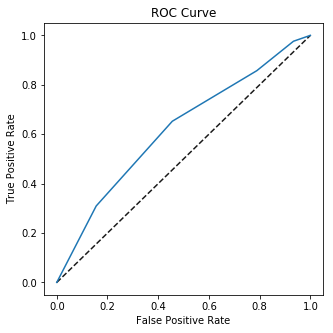

In [62]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

y_pred_prob = KNN.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [63]:
# Decision Tree #

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DTpred = DT.predict(X_test)

print(confusion_matrix(y_test, DTpred))
print(classification_report(y_test, DTpred))
print(round(accuracy_score(y_test, DTpred),4)*100)

[[ 32  58]
 [ 48 162]]
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        90
           1       0.74      0.77      0.75       210

   micro avg       0.65      0.65      0.65       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.64      0.65      0.64       300

64.67


In [65]:
#Hyper parameter tuning

parameter_DecisionTree = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 'min_samples_split':[2,3,5],
                'criterion':['entropy','gini']}
GridSearchDecisionTree = GridSearchCV(estimator=DecisionTreeClassifier(),
                                     param_grid=parameter_DecisionTree,
                                     cv=cv_method,
                                     verbose=1,
                                     n_jobs=-2,
                                     scoring='roc_auc')

GridSearchDecisionTree.fit(X_train,y_train)

print("Best Score:" + str(GridSearchDecisionTree.best_score_))
print("Best Parameters: " + str(GridSearchDecisionTree.best_params_))

Fitting 50 folds for each of 84 candidates, totalling 4200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 498 tasks      | elapsed:    0.5s


Best Score:0.6826457725947521
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


[Parallel(n_jobs=-2)]: Done 4200 out of 4200 | elapsed:    3.8s finished


In [66]:
results_DT = get_search_results(GridSearchDecisionTree)
results_DT.head()

,mean_score,std_score,max_score,min_score,criterion,max_depth,min_samples_split
48,0.682646,0.0474241,0.807094,0.526361,gini,3,2
49,0.682519,0.0480889,0.807094,0.516642,gini,3,3
50,0.682335,0.0480112,0.807094,0.516642,gini,3,5
7,0.680578,0.0502773,0.800777,0.526361,entropy,3,3
8,0.680452,0.0501694,0.800777,0.526361,entropy,3,5


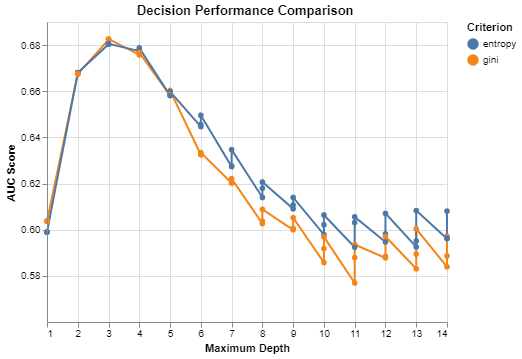

In [67]:
import altair as alt
alt.Chart(results_DT, 
          title='Decision Performance Comparison '
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('criterion:N', title='Criterion')
)

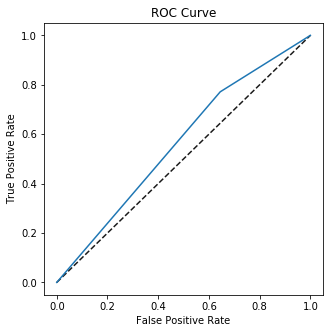

In [68]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

y_pred_prob = DT.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [69]:
# GradientBoostClassification

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
GBpred = GB.predict(X_test)

print(confusion_matrix(y_test, GBpred))
print(classification_report(y_test, GBpred))
print(round(accuracy_score(y_test, GBpred),3)*100)

[[ 35  55]
 [ 19 191]]
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        90
           1       0.78      0.91      0.84       210

   micro avg       0.75      0.75      0.75       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.74      0.75      0.73       300

75.3


In [71]:
#Hyper parameter tuning

parameter_GB = {'max_features': [5,10,15,20,25,30],
               'max_depth': [2,3,4,5,6,7],
               'min_samples_split': [2,3,4,5]}
GridSearchGB = GridSearchCV(estimator=GradientBoostingClassifier(),
                                     param_grid=parameter_GB,
                                     cv=cv_method,
                                     verbose=1,
                                     n_jobs=-2,
                                     scoring='roc_auc')

GridSearchGB.fit(X_train,y_train)
print("Best Score:" + str(GridSearchGB.best_score_))
print("Best Parameters: " + str(GridSearchGB.best_params_))

Fitting 50 folds for each of 144 candidates, totalling 7200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 102 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 702 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-2)]: Done 1702 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-2)]: Done 3102 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-2)]: Done 4500 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 5600 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-2)]: Done 6278 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-2)]: Done 7028 tasks      | elapsed:  4.4min


Best Score:0.7292541302235179
Best Parameters: {'max_depth': 2, 'max_features': 10, 'min_samples_split': 5}


[Parallel(n_jobs=-2)]: Done 7200 out of 7200 | elapsed:  4.6min finished


In [72]:
results_GB = get_search_results(GridSearchGB)
results_GB.head()

,mean_score,std_score,max_score,min_score,max_depth,max_features,min_samples_split
7,0.729254,0.041715,0.800777,0.596453,2.0,10.0,5.0
8,0.728632,0.041673,0.793732,0.597789,2.0,15.0,2.0
4,0.728416,0.044006,0.801020,0.591351,2.0,10.0,2.0
9,0.727347,0.042949,0.795190,0.596696,2.0,15.0,3.0
10,0.727046,0.041513,0.790816,0.594509,2.0,15.0,4.0


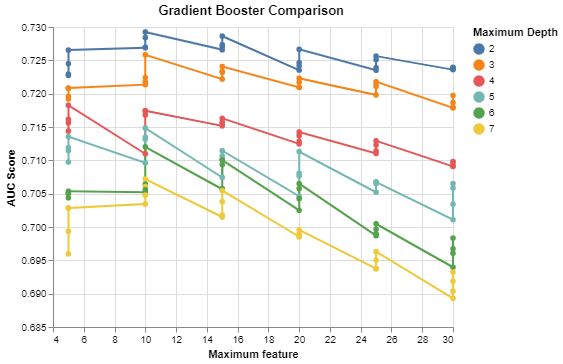

In [73]:
import altair as alt
alt.Chart(results_GB, 
          title='Gradient Booster Comparison '
         ).mark_line(point=True).encode(
    alt.X('max_features', title='Maximum feature'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('max_depth:N', title='Maximum Depth')
)

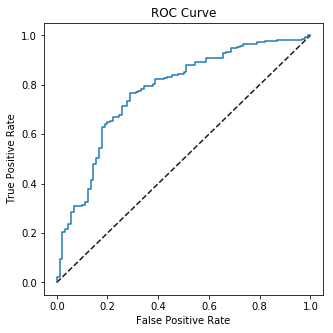

In [74]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

y_pred_prob = GB.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [75]:
# Performance Comparison
from sklearn.model_selection import cross_val_score


cv_method_ttest = RepeatedStratifiedKFold(n_splits=5,random_state=999)

cv_results_KNN = cross_val_score(estimator=GridSearchKNN.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
print('Accuracy score for k-NN:',round(cv_results_KNN.mean(),3)*100)

Accuracy score for k-NN: 72.8


In [76]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5,random_state=999)

cv_results_DT = cross_val_score(estimator=GridSearchDecisionTree.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
print('Accuracy score for Decision Tree:',round(cv_results_DT.mean(),3)*100)

Accuracy score for Decision Tree: 70.3


In [77]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5,random_state=999)

cv_results_GB = cross_val_score(estimator=GridSearchGB.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
print('Accuracy score for Gradient Booster:',round(cv_results_GB.mean(),3)*100)

Accuracy score for Gradient Booster: 75.5


In [78]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_DT, cv_results_GB))
print(stats.ttest_rel(cv_results_KNN, cv_results_GB))

Ttest_relResult(statistic=1.8886681415693183, pvalue=0.06486299472151935)
Ttest_relResult(statistic=-5.252780939840686, pvalue=3.233324087619003e-06)
Ttest_relResult(statistic=-3.507908525931802, pvalue=0.0009778759141004024)


In [79]:
# As p-value is smaller than alpha = 0.05 for GradientBoosterClassifier, we can conclude that GB is the best model
# when compared on Test Data.

In [80]:
#Evaluating model performances on the test data
pred_KNN = GridSearchKNN.predict(X_test)
pred_DT = GridSearchDecisionTree.predict(X_test)
pred_GB = GridSearchGB.predict(X_test)

In [81]:
#Classification report and Accuracy score for each of the model.

from sklearn import metrics
print("\nClassification report K-Nearest Neighbor") 
print(metrics.classification_report(y_test, pred_KNN))

print("\nClassification report Decision Tree") 
print(metrics.classification_report(y_test, pred_DT))

print("\nClassification report for Gradient Boost") 
print(metrics.classification_report(y_test, pred_GB))



Classification report K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.57      0.04      0.08        90
           1       0.71      0.99      0.82       210

   micro avg       0.70      0.70      0.70       300
   macro avg       0.64      0.52      0.45       300
weighted avg       0.67      0.70      0.60       300


Classification report Decision Tree
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        90
           1       0.79      0.86      0.82       210

   micro avg       0.74      0.74      0.74       300
   macro avg       0.68      0.66      0.66       300
weighted avg       0.72      0.74      0.73       300


Classification report for Gradient Boost
              precision    recall  f1-score   support

           0       0.64      0.33      0.44        90
           1       0.76      0.92      0.83       210

   micro avg       0.74      0.74      0.74       300
   macr

In [82]:
#Confusion Matrix
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred_KNN))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, pred_DT))
print("\nConfusion matrix for Gradient Boost") 
print(metrics.confusion_matrix(y_test, pred_GB))


Confusion matrix for K-Nearest Neighbor
[[  4  86]
 [  3 207]]

Confusion matrix for Decision Tree
[[ 41  49]
 [ 30 180]]

Confusion matrix for Gradient Boost
[[ 30  60]
 [ 17 193]]


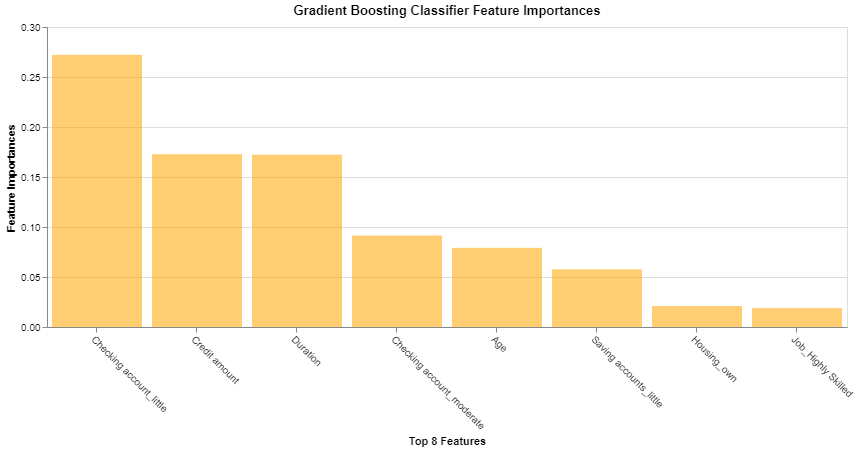

In [85]:
#Feature selection and Ranking for top 8 most variables, post hyperparameter tunning

features = 8
model_gbx = GradientBoostingClassifier(max_features=10,min_samples_split=5,max_depth=2)
model_gbx.fit(x,y)
fs_indices_gbx = np.argsort(model_gbx.feature_importances_)[::-1][0:features]

best_features_gbx = Data_df.columns[fs_indices_gbx].values
feature_importances_gbx = model_gbx.feature_importances_[fs_indices_gbx]

import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=800, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.55, 
                                color=color).encode(
        alt.X('features', title='Top 8 Features', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Feature Importances')
    )
    
    return chart


plot_imp(best_features_gbx, feature_importances_gbx, 'Gradient Boosting Classifier', 'orange')

In [84]:
feature_importance = model_gbx.feature_importances_[fs_indices_gbx]
feature_importance

array([0.22246284, 0.20570165, 0.17585938, 0.12123027, 0.06441562,
       0.0550948 , 0.02445748, 0.01689248])